## Fufun Dany Artheja

In [110]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [113]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

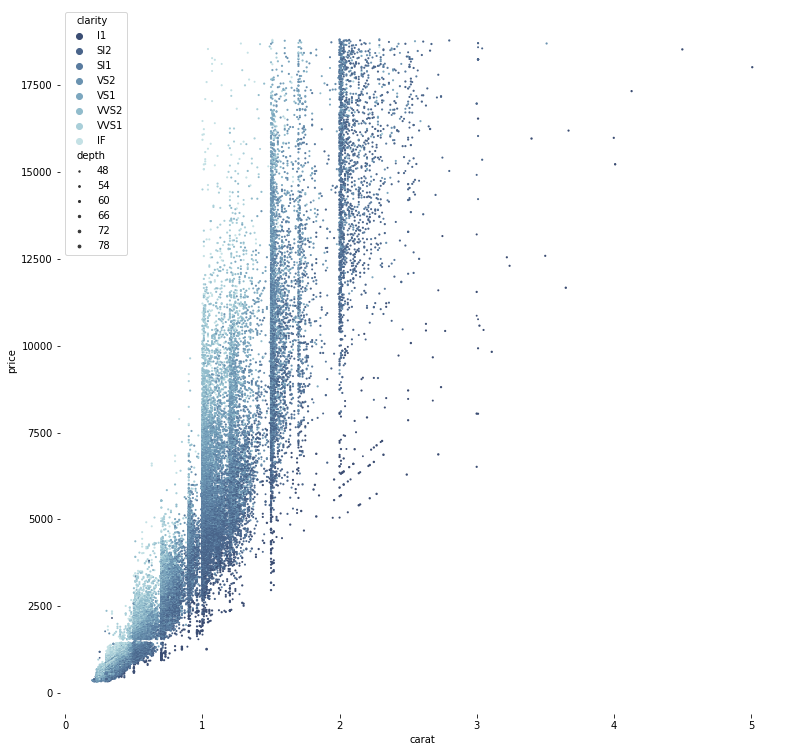

In [114]:
fig, ax = plt.subplots(figsize=(13, 13))

expected= ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
sns.scatterplot(data=df, x="carat", y="price", hue="clarity", size="depth",
                hue_order=expected, palette="ch:r=-.2,d=.3_r", sizes=(1,8),
                edgecolor="none", linewidth=0, ax=ax)
sns.despine(bottom = True, left = True)

plt.show()


Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


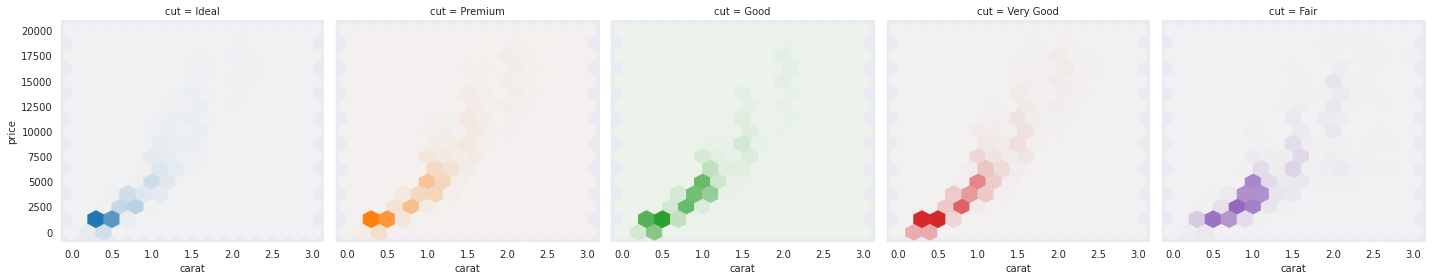

In [115]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style('dark'):
    g = sns.FacetGrid(df, hue="cut", col="cut", height=4)
g.map(hexbin, "carat", "price",extent=[0.0, 3.0, 0, 20000])


Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

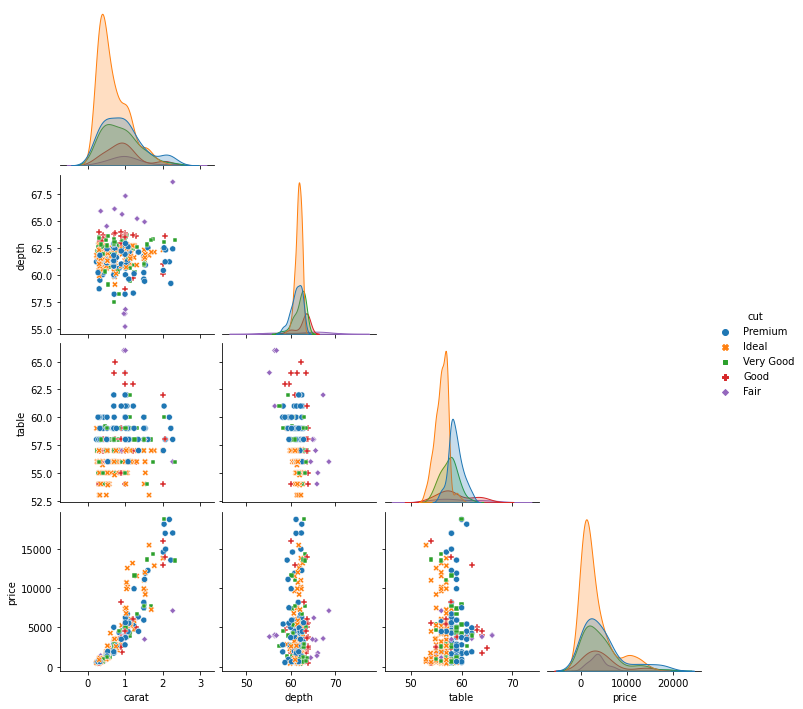

In [116]:
df = df.sample(n=300, random_state=123)

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
    
hue1 = ['Premium','Ideal','Very Good','Good','Fair']
g = sns.pairplot(df,  vars=['carat', 'depth', 'table', 'price'],
                 hue="cut", hue_order=hue1, markers=True, corner=True)
#g.map_upper(hide_current_axis)

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

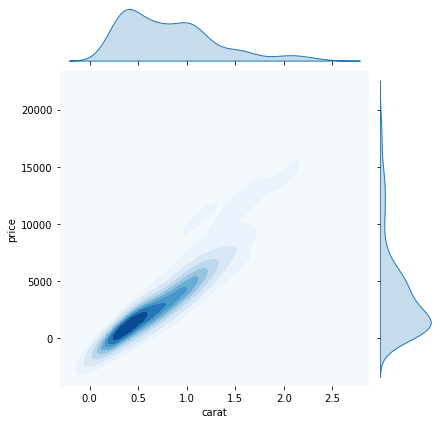

In [117]:
from scipy.stats import pearsonr
import scipy.stats as stats

j = sns.jointplot(data=df, x="carat", y="price", kind="kde", fill=True, thresh=0, cmap='Blues')
sns.despine(bottom = True, left = True)


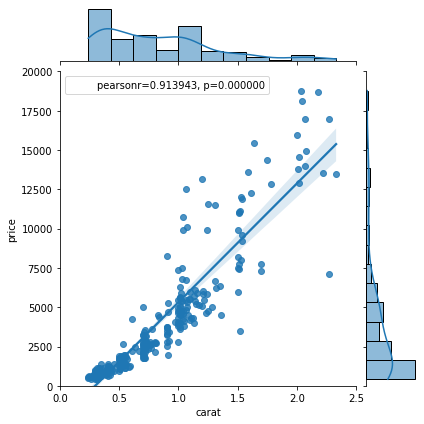

In [118]:
from scipy.stats import pearsonr
import scipy.stats as stats

x = df["carat"]
y = df["price"]
j = sns.jointplot(data=df, x="carat", y="price", kind="reg",xlim=[0,2.5], ylim=[0,20000])
r, p = stats.pearsonr(x,y)
phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
j.ax_joint.legend([phantom],['pearsonr={:f}, p={:f}'.format(r,p)])
plt.show()

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)